# 无监督学习与预处理

## 无监督学习的类型


## 无监督学习的挑战

## 预处理与缩放

In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import sklearn

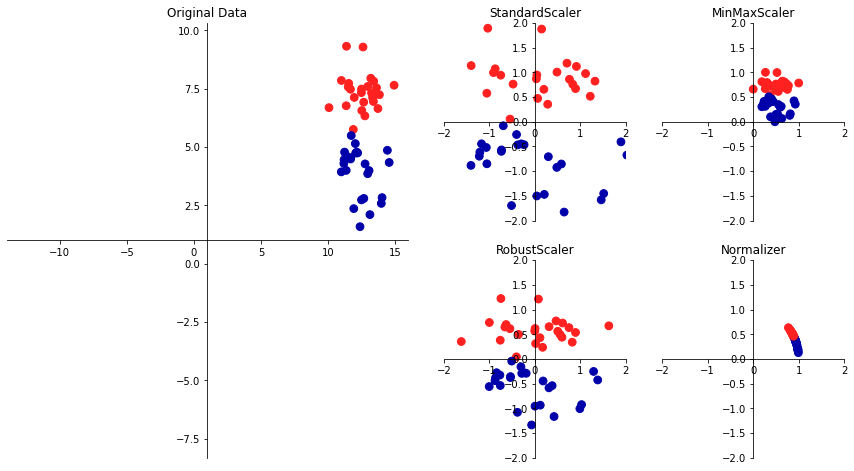

In [15]:
mglearn.plots.plot_scaling()

### 不同类型的预处理

### 应用数据变换

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [22]:
X_train_scaled = scaler.transform(X_train)

print('transformed shape: {}'.format(X_train_scaled.shape))
print('per-feature minimum before scaling: \n{}'.format(X_train.min(axis=0)))
print('per-feature maximum before scaling: \n{}'.format(X_train.max(axis=0)))
print('per-feature minimum after scaling: \n{}'.format(X_train_scaled.min(axis=0)))
print('per-feature maximum after scaling: \n{}'.format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling: 
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [25]:
X_test_scaled = scaler.transform(X_test)
print('per-feature minimum after scaling: \n{}'.format(X_test_scaled.min(axis=0)))
print('per-feature maximum after scaling: \n{}'.format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling: 
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling: 
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### 对训练数据和测试数据进行相同的缩放

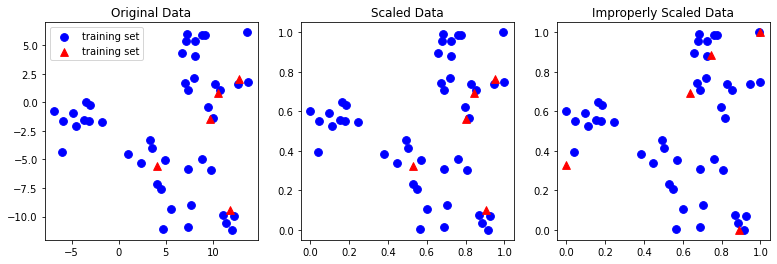

In [45]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c='blue', s=60, label='training set')
axes[0].scatter(X_test[:, 0], X_test[:, 1], c='r', s=60, label='training set', marker='^')
axes[0].set_title('Original Data')
axes[0].legend()

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='blue', s=60, label='training set')
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='r', s=60, label='training set', marker='^')
axes[1].set_title('Scaled Data')

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='blue', s=60, label='training set')
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], c='r', s=60, label='training set', marker='^')
axes[2].set_title('Improperly Scaled Data')
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_scaled_d = scaler.fit_transform(X_train)
y_scaled_d = scaler.transform(X_test)

### 预处理对监督学习的作用

In [66]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)
svm = SVC()
svm.fit(X_train, y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [67]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Test set accuracy: 0.97


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)
print('SVM test accuracy: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.965


## 降维、特征提取与流形学习

### 主成分分析

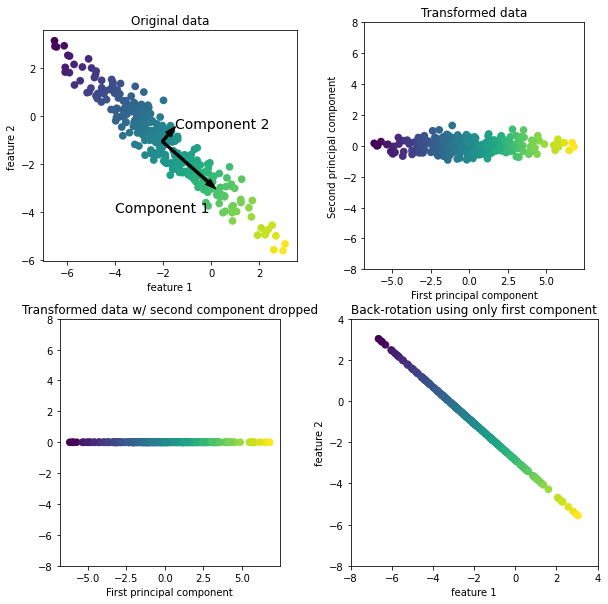

In [69]:
mglearn.plots.plot_pca_illustration()

#### 将 PCA 应用于 cancer 数据集并可视化

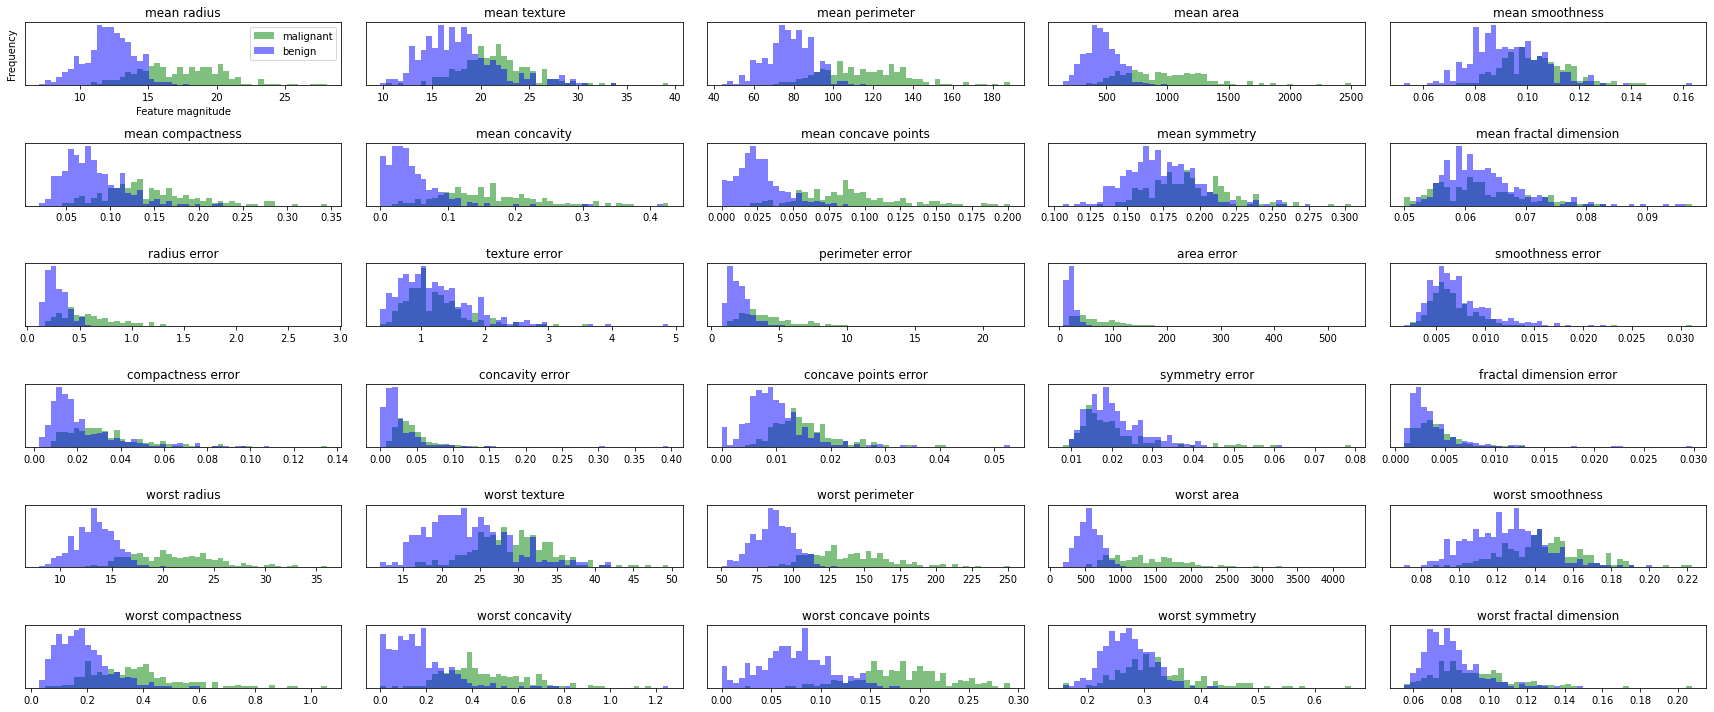

In [87]:
fig, axes = plt.subplots(6, 5, figsize=(24, 10))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='g', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='b', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [90]:
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

In [92]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print('Original shape: {}'.format(X_scaled.shape))
print('Reduced shape: {}'.format(X_pca.shape))

Original shape: (569, 30)
Reduced shape: (569, 2)


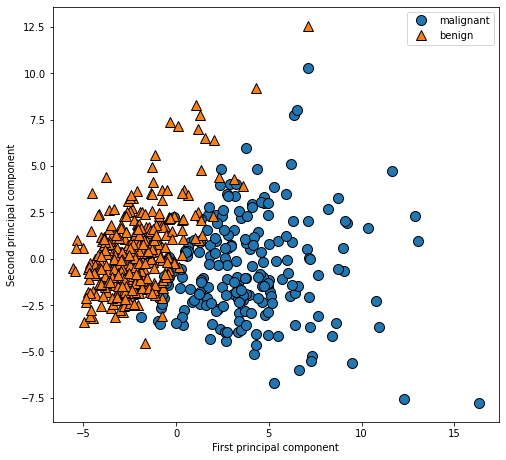

In [95]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [97]:
print('PCA component shape: {}'.format(pca.components_.shape))

PCA component shape: (2, 30)


In [98]:
print('PCA components: \n{}'.format(pca.components_))

PCA components: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


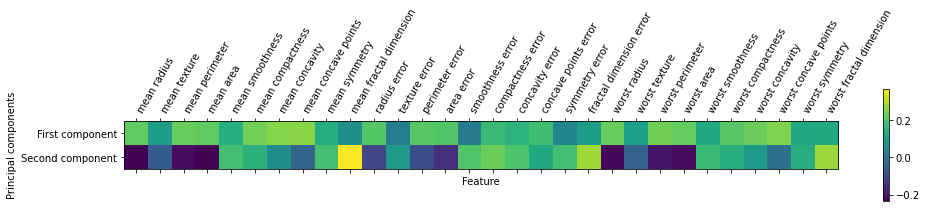

In [101]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()

#### 特征提取的特征脸

In [108]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [159]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [160]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end='      ')
    if(i + 1) % 3 == 0:
        # 自带换行
        print('')

Alejandro Toledo           39      Alvaro Uribe               35      Amelie Mauresmo            21      
Andre Agassi               36      Angelina Jolie             20      Ariel Sharon               77      
Arnold Schwarzenegger      42      Atal Bihari Vajpayee       24      Bill Clinton               29      
Carlos Menem               21      Colin Powell              236      David Beckham              31      
Donald Rumsfeld           121      George Robertson           22      George W Bush             530      
Gerhard Schroeder         109      Gloria Macapagal Arroyo    44      Gray Davis                 26      
Guillermo Coria            30      Hamid Karzai               22      Hans Blix                  39      
Hugo Chavez                71      Igor Ivanov                20      Jack Straw                 28      
Jacques Chirac             52      Jean Chretien              55      Jennifer Aniston           21      
Jennifer Capriati          42      Jennifer Lo

In [109]:
mask = np.zeros(people.target.shape, dtype=np.bool_)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[: 50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42
)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print('Test set score of 1-NN: {:.2f}'.format(knn.score(X_test, y_test)))

Test set score of 1-NN: 0.17


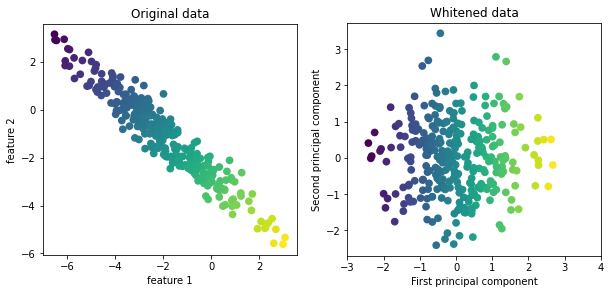

In [169]:
mglearn.plots.plot_pca_whitening()

In [174]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape: {}'.format(X_train_pca.shape))

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('Test set accuracy: {}'.format(knn.score(X_test_pca, y_test)))

X_train_pca.shape: (2267, 100)
Test set accuracy: 0.20634920634920634


In [175]:
print('pca.components_.shape: {}'.format(pca.components_.shape))

pca.components_.shape: (100, 5655)


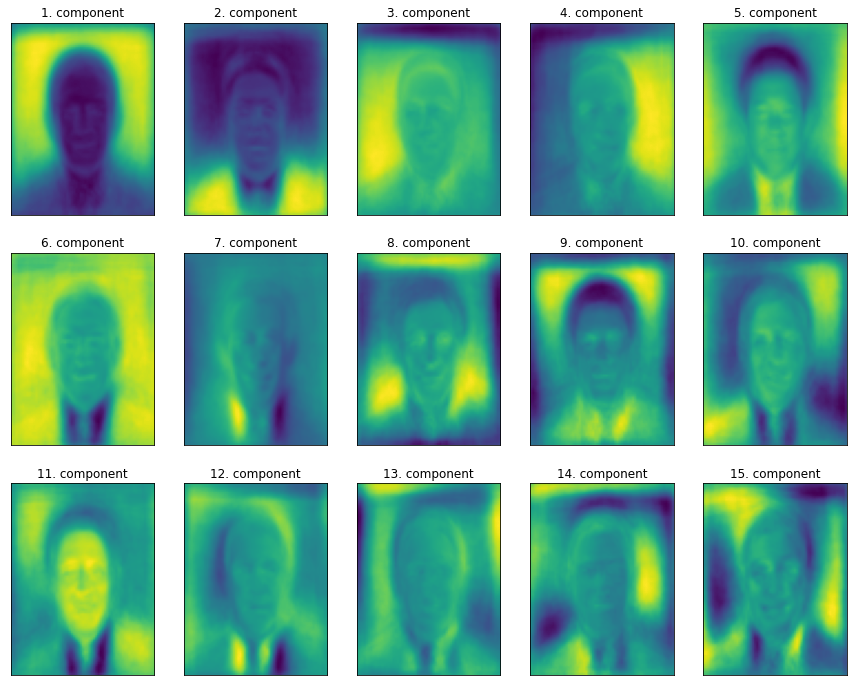

In [185]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title('{}. component'.format((i + 1)))


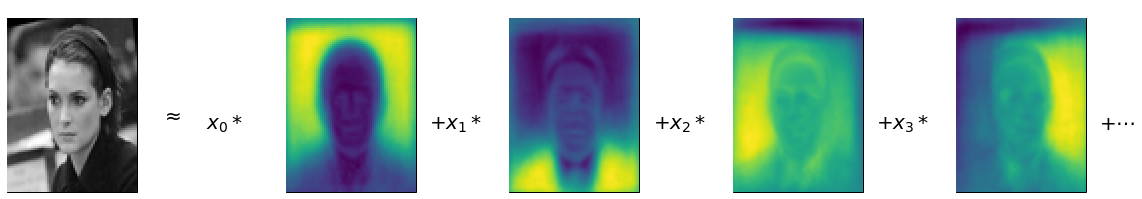

In [212]:
# FIXME hide this!
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


image_shape = people.images[0].shape
plt.figure(figsize=(20, 3))
ax = plt.gca()

imagebox = OffsetImage(people.images[0], zoom=2, cmap="gray")
ab = AnnotationBbox(imagebox, (.05, 0.4), pad=0.0, xycoords='data')
ax.add_artist(ab)

for i in range(4):
    imagebox = OffsetImage(pca.components_[i].reshape(image_shape), zoom=2,
                           cmap="viridis")

    ab = AnnotationBbox(imagebox, (.3 + .2 * i, 0.4),
                        pad=0.0,
                        xycoords='data'
                        )
    ax.add_artist(ab)
    if i == 0:
        plt.text(.17, .25, r'$x_{} *$'.format(i), fontdict={'fontsize': 20})
    else:
        plt.text(.17 + .2 * i, .25, r'$+ x_{} *$'.format(i),
                 fontdict={'fontsize': 20})

plt.text(0.97, .25, r'$+ \cdots$', fontdict={'fontsize': 20})

plt.text(.13, .3, r'$\approx$', fontdict={'fontsize': 20})
plt.axis("off")
plt.show()

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]], dtype=float32), array([[9.227220e-04, ..., 2.563117e-05],
       ...,
       [2.701525e-03, ..., 1.589132e-04]], dtype=float32))
________________________________________________________pca_faces - 3.7s, 0.1min


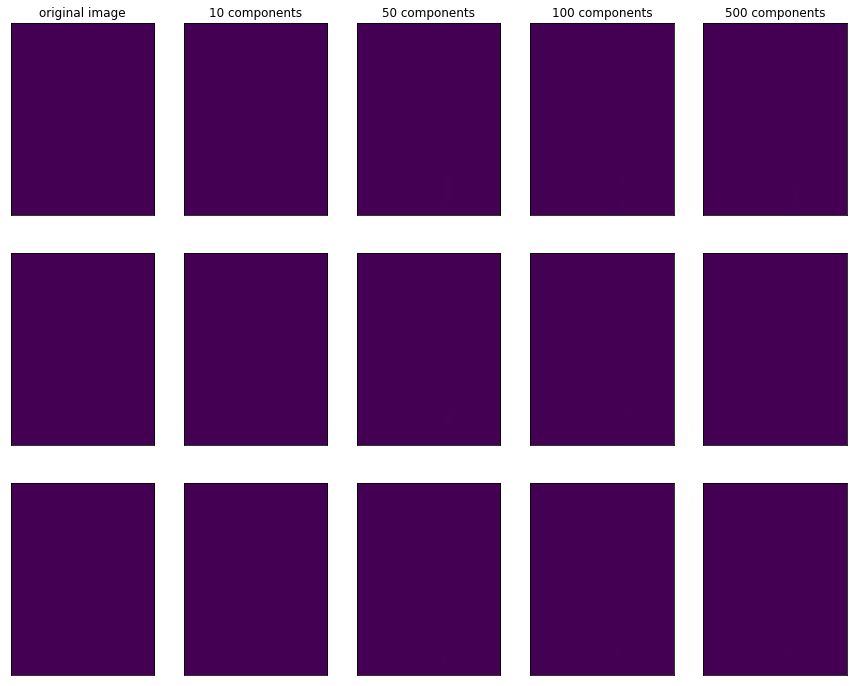

In [213]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

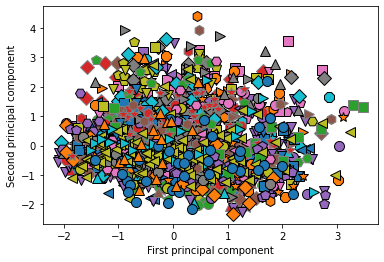

In [218]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

### 非负矩阵分解

#### 将 NMF 应用于模拟数据

d:\Python\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


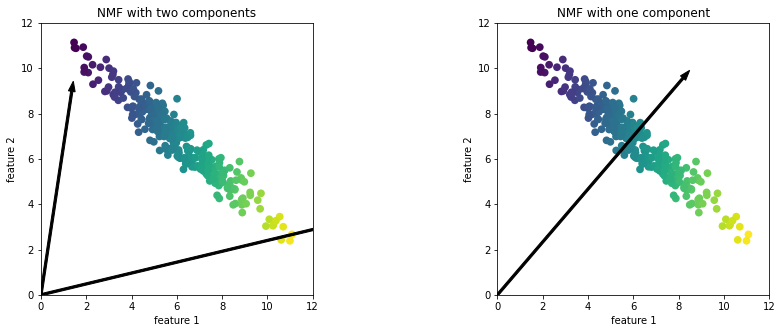

In [229]:
mglearn.plots.plot_nmf_illustration()

#### 将 NMF 应用于人脸图像

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0., ..., 0.],
       ...,
       [0., ..., 0.]], dtype=float32), array([[9.227220e-04, ..., 2.563117e-05],
       ...,
       [2.701525e-03, ..., 1.589132e-04]], dtype=float32))


d:\Python\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


______________________________________________________nmf_faces - 508.5s, 8.5min


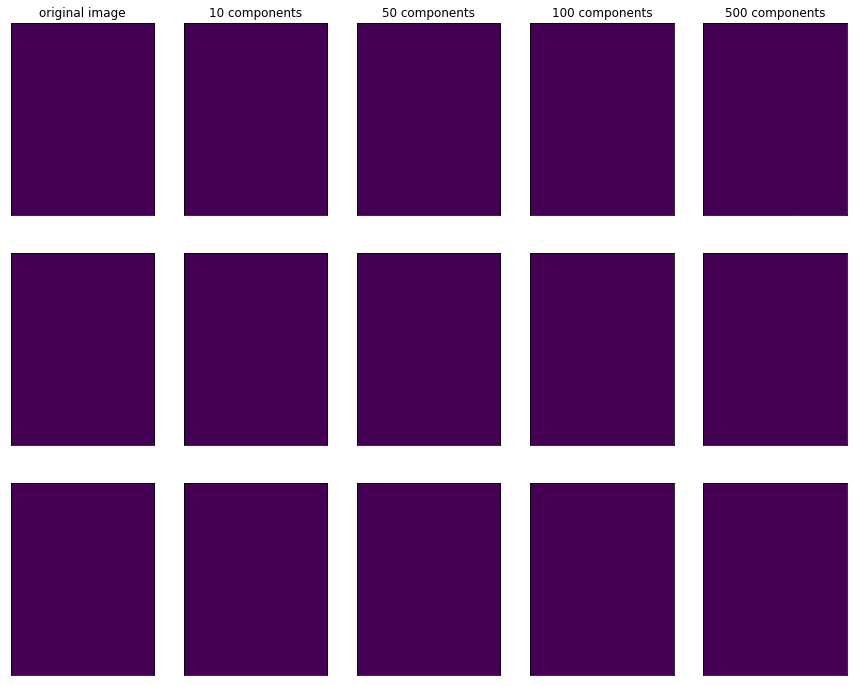

In [230]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

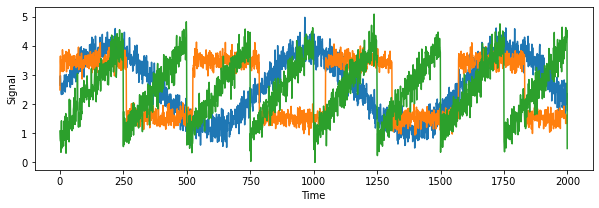

In [4]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(10, 3))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")
plt.show()

In [6]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print('Shape of measurements: {}'.format(X.shape))

Shape of measurements: (2000, 100)


In [9]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print('Recovered signal shape: {}'.format(S_.shape))

Recovered signal shape: (2000, 3)


In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)

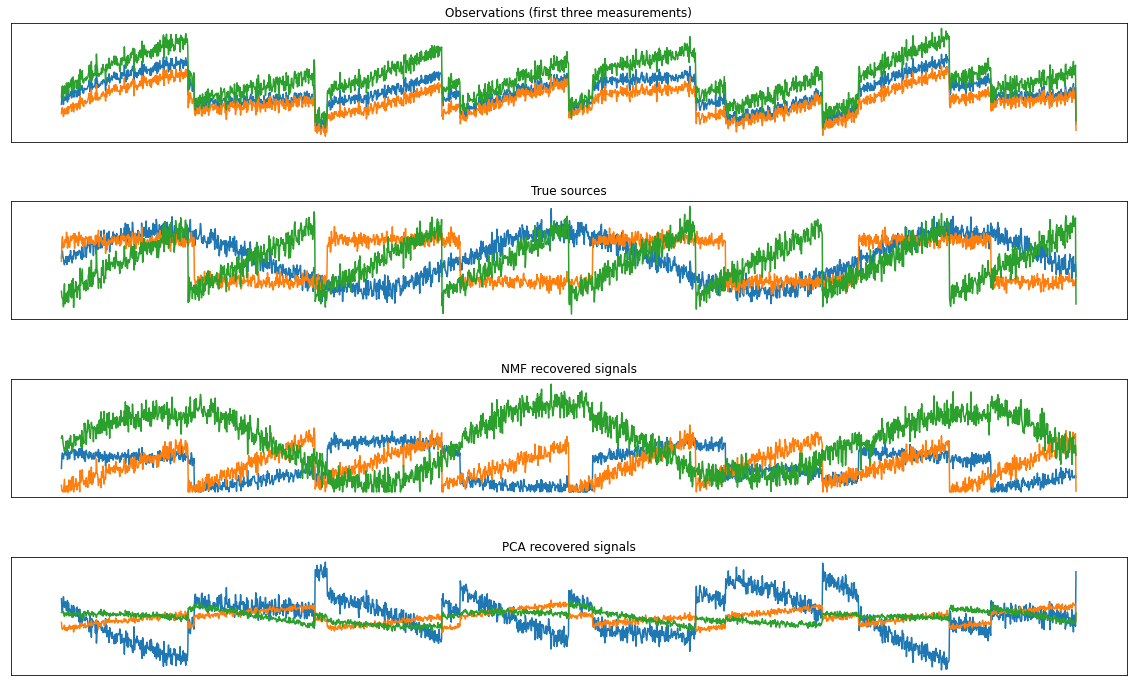

In [16]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(20, 12), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

### 用t-SNE进行流行学习

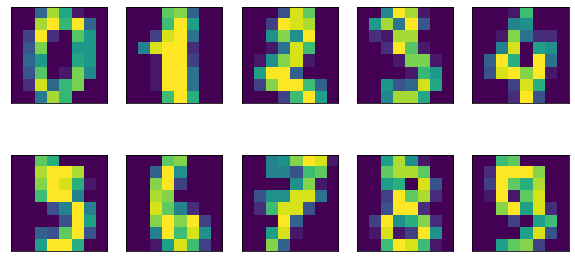

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
 
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

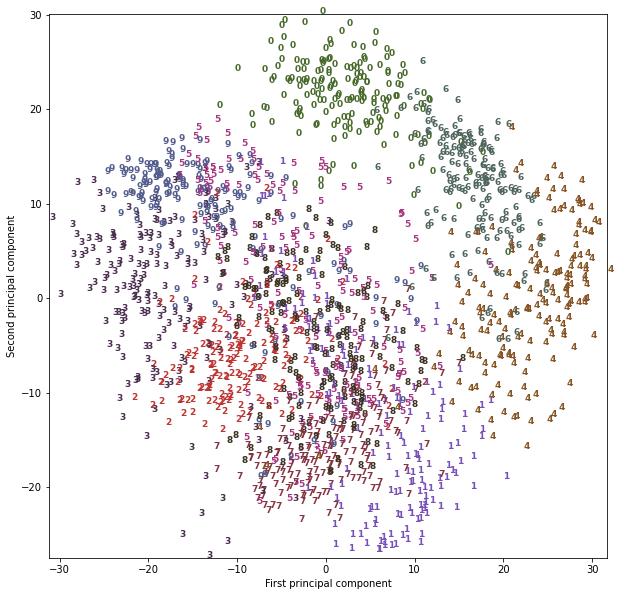

In [31]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

d:\Python\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


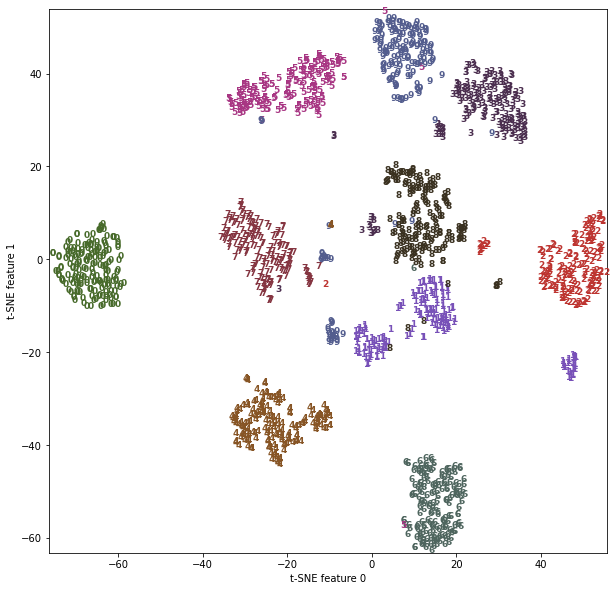

In [42]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

## 聚类

### k均值聚类

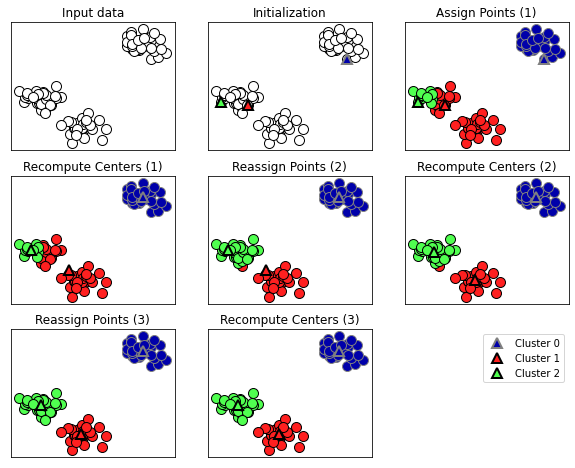

In [53]:
mglearn.plots.plot_kmeans_algorithm()

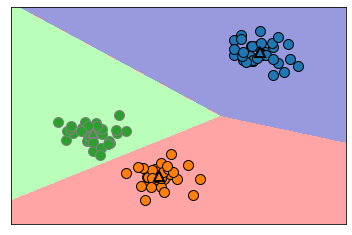

In [54]:
mglearn.plots.plot_kmeans_boundaries()

In [55]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X, y)

KMeans(n_clusters=3)

In [58]:
print('Cluster memberships: \n{}'.format(kmeans.labels_))

Cluster memberships: 
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


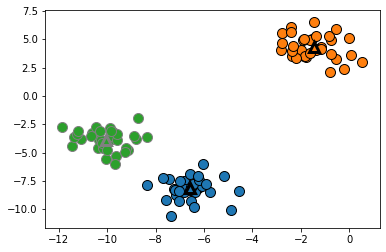

In [63]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
                         markers='^', markeredgewidth=3)
plt.show()

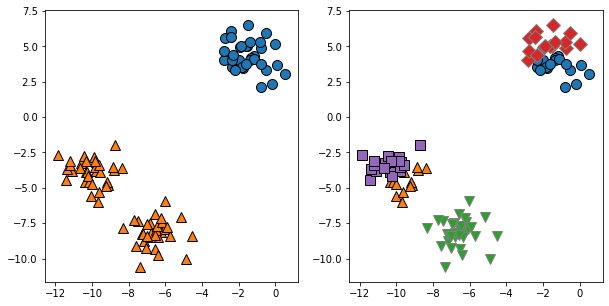

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for i, ax in zip([2, 5], axes.ravel()):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    assignments = kmeans.labels_
    mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=ax)
plt.show()

#### k均值的失败案例

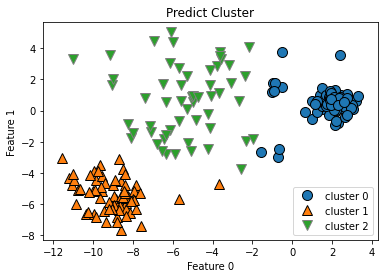

In [76]:
# 预测的分类情况
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title('Predict Cluster')
plt.show()

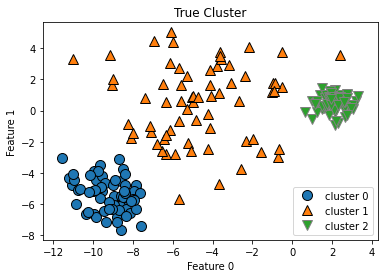

In [75]:
# 真实的分布情况
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_varied)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title('True Cluster')
plt.show()

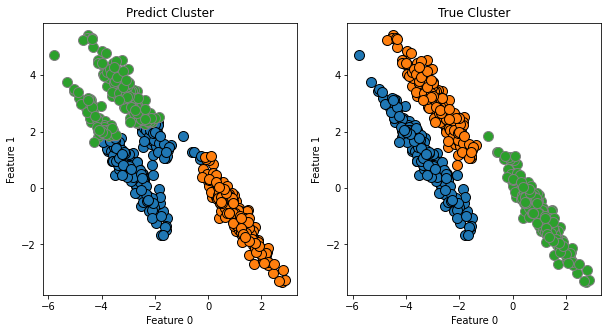

In [96]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
for ax, title, label in zip(axes.ravel(), ['Predict Cluster', 'True Cluster'], [kmeans.labels_, y]):
    mglearn.discrete_scatter(X[:, 0], X[:, 1], label, markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    ax.set_title(title)
plt.show()

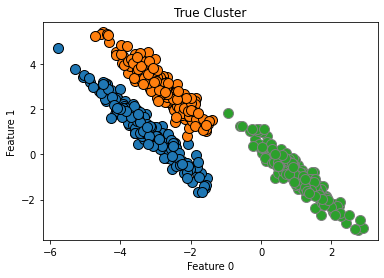

In [84]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y, markers='o')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title('True Cluster')
plt.show()

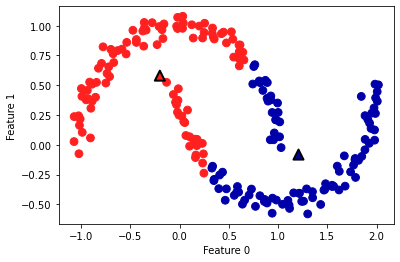

In [107]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^',
            c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

In [117]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0
)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

d:\Python\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


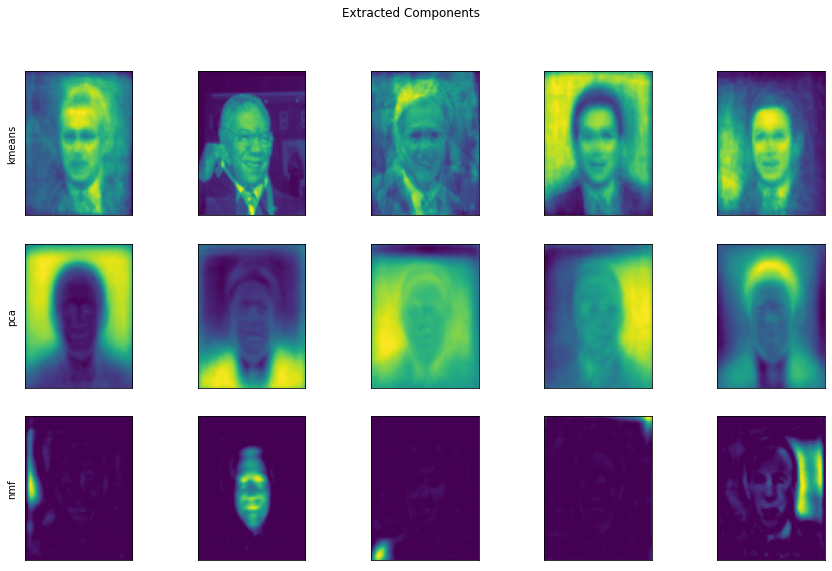

In [133]:
fig, axes = plt.subplots(3, 5, figsize=(15, 9),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('Extracted Components')
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel('kmeans')
axes[1, 0].set_ylabel('pca')
axes[2, 0].set_ylabel('nmf')
plt.show()

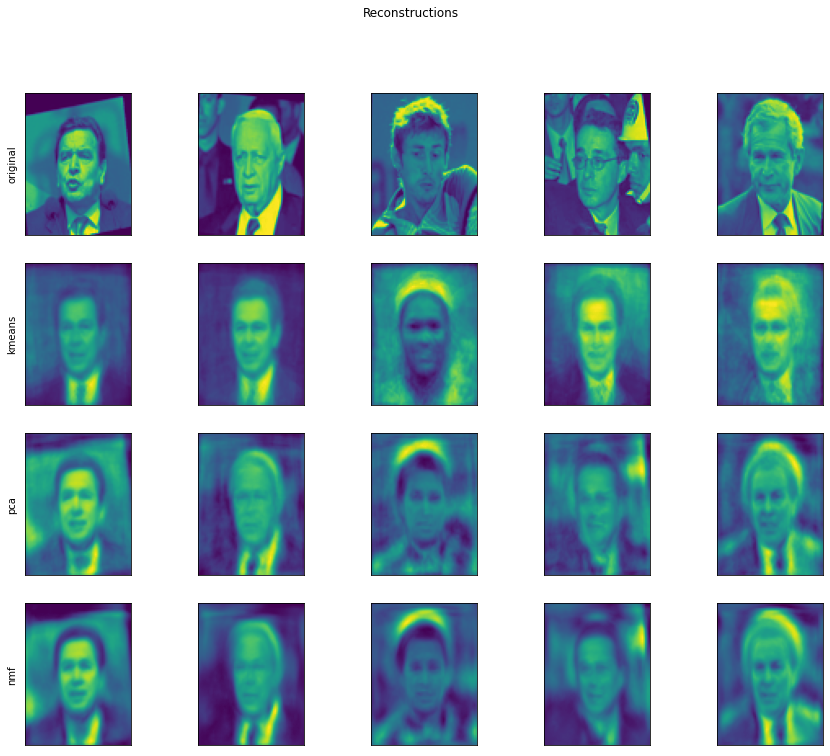

In [134]:
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(15, 12))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.show()

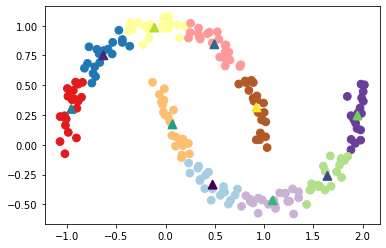

In [138]:
X, y = make_moons(n_samples=200, noise=.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)

y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1],
            s=60,
            marker='^',
            c=range(kmeans.n_clusters), linewidth=2)
plt.show()

In [139]:
print('Cluster memberships:\n{}'.format(y_pred))

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


In [142]:
distance_features = kmeans.transform(X)
print('Distance features shape: {}'.format(distance_features.shape))
print('Distance features: \n{}'.format(distance_features))

Distance features shape: (200, 10)
Distance features: 
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


### 凝聚聚类

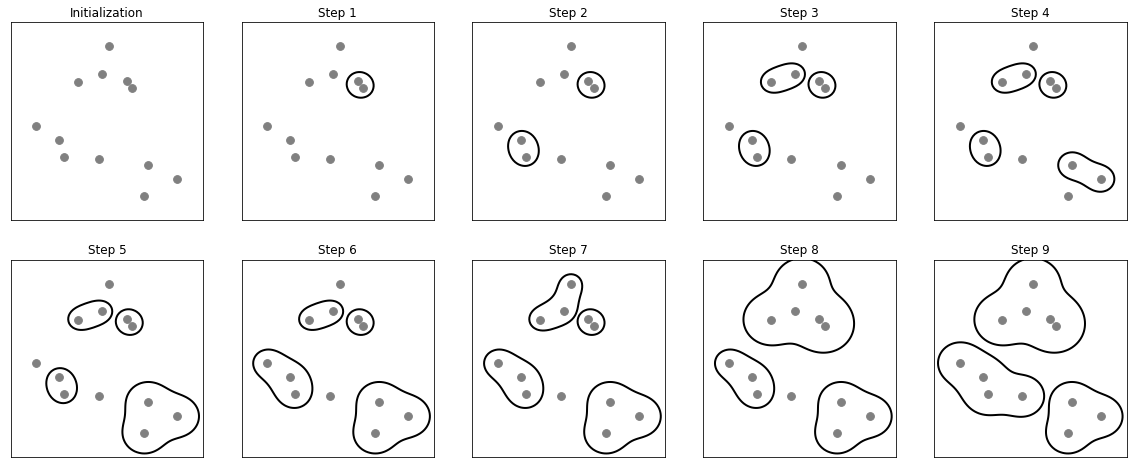

In [143]:
mglearn.plots.plot_agglomerative_algorithm()

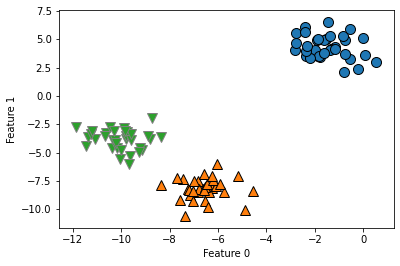

In [148]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

#### 层次聚类与树状图

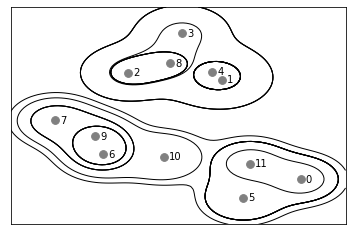

In [149]:
mglearn.plots.plot_agglomerative()

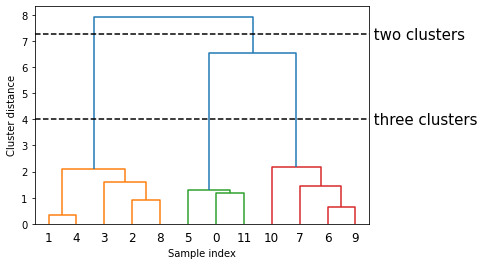

In [157]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

In [158]:
linkage_array

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 2.        ,  8.        ,  0.92683223,  2.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 15.        ,  1.30311575,  3.        ],
       [ 7.        , 13.        ,  1.4440339 ,  3.        ],
       [ 3.        , 14.        ,  1.60041812,  3.        ],
       [12.        , 18.        ,  2.07815795,  5.        ],
       [10.        , 17.        ,  2.15981886,  4.        ],
       [16.        , 20.        ,  6.55024854,  7.        ],
       [19.        , 21.        ,  7.92446877, 12.        ]])

### DBSCAN

### 聚类算法的对比与评估

### 聚类方法小结